In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH1\forest+fires\Data.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,8,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,8,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


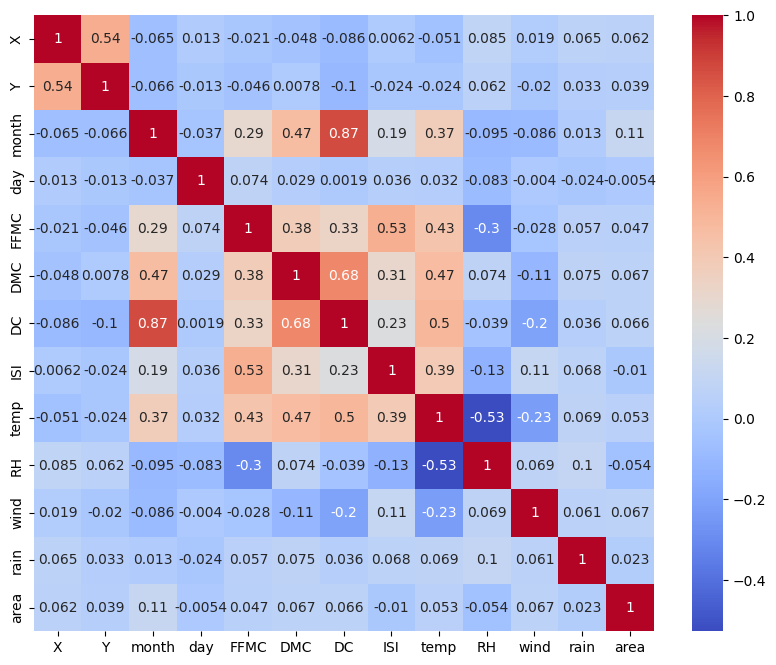

In [4]:
correlation_matrix = df.corr()

# Vẽ heatmap để quan sát
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [5]:
threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
X_reduced = df.drop(to_drop + ['area'], axis=1)

In [6]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Khởi tạo DataFrame rỗng để lưu VIF
vif_data = pd.DataFrame()

# Tính VIF cho từng cột trong X_reduced
vif_data["Feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# In kết quả
print(vif_data)

   Feature        VIF
0        X   7.283197
1        Y  18.898586
2    month  60.364591
3      day   2.983570
4     FFMC  77.990219
5      DMC   9.718019
6       DC  47.371322
7      ISI   6.479903
8     temp  28.937595
9       RH  12.346541
10    wind   6.950291
11    rain   1.041421


In [7]:
# Ngưỡng loại bỏ (có thể điều chỉnh)
threshold = 0.9  

# Tính ma trận tương quan
correlation_matrix = df.corr()

# Lấy danh sách các cặp có tương quan cao
high_corr_features = set()

# Duyệt qua ma trận tương quan để loại bỏ các cột
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Loại bỏ các cột có tương quan cao
df_reduced = df.drop(columns=high_corr_features)

In [8]:
from sklearn.linear_model import LinearRegression

X = df_reduced.drop('area', axis=1)
y = df_reduced['area']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
y_pred = model.predict(X)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R-squared:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R-squared: 0.03767895029607371
MAE: 1.1240886148914715
MSE: 1.8782971854447854
RMSE: 1.3705098268326228


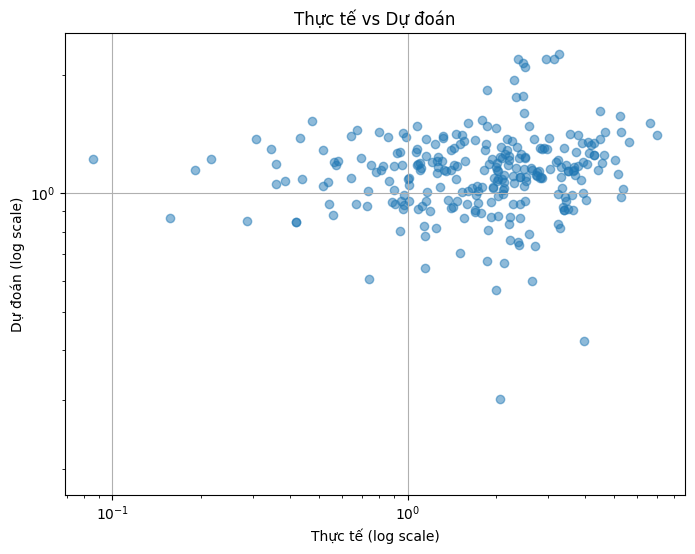

In [11]:
# Vẽ biểu đồ thực tế vs dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Thực tế (log scale)")
plt.ylabel("Dự đoán (log scale)")
plt.title("Thực tế vs Dự đoán")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Từ biểu đồ trên ta có thể thấy rằng:
1. Phân tán dữ liệu lớn:
Các điểm dữ liệu khá phân tán, cho thấy mô hình đang gặp khó khăn trong việc dự đoán chính xác giá trị area.
Có nhiều điểm dự đoán thấp hơn hoặc cao hơn thực tế, cho thấy mô hình không thể nắm bắt hết các xu hướng của dữ liệu.
2. Dữ liệu lệch và outliers:
Trên thang log-log, một số điểm dữ liệu rất nhỏ hoặc rất lớn cho thấy có sự xuất hiện của các outliers (giá trị ngoại lai). Điều này ảnh hưởng đến hiệu suất của mô hình.
3. R-squared thấp (dự đoán kém):
Mô hình hồi quy tuyến tính thường không hiệu quả trong việc xử lý dữ liệu phi tuyến tính hoặc dữ liệu có sự chênh lệch lớn giữa các giá trị.
